# IMaGES on ROI time series

In [1]:
import os
from os.path import join as pjoin
import glob
import pandas as pd
import pydot
from IPython.display import SVG

## Get data

In [2]:
# directory with csv files for roi time series (seperate csv file for each run)
csvdir_allruns = pjoin('/host', 'famfaces', 'extract_meants', 'csv', 'allruns')

In [3]:
def getdfs(csvdir):
    """give us list of data frames for csv files in directory"""
    dfs = []
    for csvfile in glob.glob(csvdir_allruns + os.sep + "*.csv"):
        df = pd.read_csv(csvfile)
        dfs.append(df)
    return dfs

In [4]:
dfs = getdfs(csvdir_allruns)

## Perform IMaGES

In [5]:
from pycausal import pycausal as pc
pc.start_vm()

In [6]:
# perform images search
from pycausal import search as s
images = s.imagesSemBic(dfs, verbose = True)

In [38]:
# show nodes
# images.getNodes()

In [40]:
# show edges
images.getEdges()

[u'OccFus-R --- EV2-L',
 u'vPreCun-R --> vPreCun-L',
 u'pFus-L --- mFus-L',
 u'pFus-R --- pFus-L',
 u'mFus-L --- mFus-R',
 u'OccFus-L --> dPreCun-R',
 u'pMTG-R --> IFG2-R',
 u'TPJ-L --> mMTG-L',
 u'aMTG-R --> aMTG-L',
 u'IFG1-L --> IFG2-L',
 u'MPFC-R --> MPFC-L',
 u'pMTG-R --> pMTG-L',
 u'OccFus-R --> OccFus-L',
 u'mMTG-L --> mMTG-R',
 u'pFus-R --- OccFus-R',
 u'dPreCun-R --> mPreCun-R',
 u'mPreCun-R --> vPreCun-R',
 u'IFG2-R --> MPFC-R',
 u'mMTG-L --> IFG1-L',
 u'TPJ-R --> TPJ-L',
 u'mMTG-R --> pMTG-R',
 u'vPreCun-L --> mPreCun-L',
 u'EV1-L --- EV1-R',
 u'EV2-L --- EV1-R',
 u'EV2-L --- EV2-R',
 u'pFus-L --> OccFus-L',
 u'mMTG-R --> aMTG-R',
 u'mPreCun-R --> TPJ-R',
 u'dPreCun-R --> dPreCun-L',
 u'TPJ-L --> mPreCun-L']

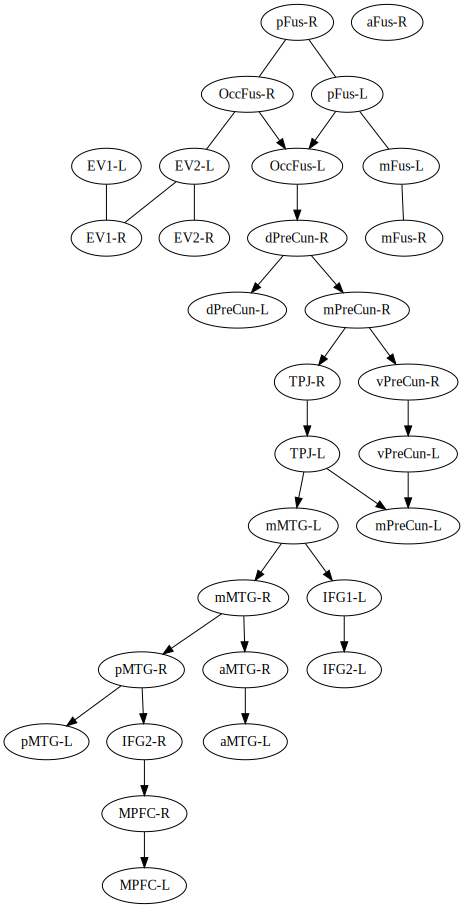

In [25]:
# render resulting graph
dot = images.getDot()
svg_str = dot.create_svg(prog='dot')
SVG(svg_str)

In [46]:
# stop running application
pc.stop_vm()

## to networkx

In [23]:
# import a dot file to networkx for handling and plotting
import networkx as nx
from networkx.drawing import nx_pydot

In [26]:
graph = nx_pydot.from_pydot(dot)